<a href="https://colab.research.google.com/github/SwathiAkiti/NeuralNetwork/blob/main/700748992_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Define data paths
data_dir = '/content/COVID-19_Radiography_Dataset'
batch_size = 8
img_size = (64, 64)

# Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


In [9]:
# GDCNN Model Architecture
def build_gdcnn(input_shape=(64, 64, 3), num_classes=4): # Change num_classes to 4
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)

    x = DepthwiseConv2D((3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = DepthwiseConv2D((3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x) # This layer now outputs 4 classes

    model = Model(inputs, outputs)
    return model

In [10]:
# Build and compile the model
model = build_gdcnn(input_shape=(64, 64, 3), num_classes=4) # Change num_classes to 4 to match the dataset
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Model Training
epochs = 20
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    verbose=1
)

# Model Evaluation
loss, accuracy, precision, recall = model.evaluate(val_gen)
specificity = 0  # Placeholder for specificity calculation, to be added based on predictions

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Sensitivity (Recall): {recall*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")

Epoch 1/20
4234/4234 ━━━━━━━━━━━━━━━━━━━━ 428s 100ms/step - accuracy: 0.5299 - loss: 1.0869 - precision_3: 0.6287 - recall_3: 0.3208 - val_accuracy: 0.6376 - val_loss: 0.8776 - val_precision_3: 0.6975 - val_recall_3: 0.5151
Epoch 2/20
4234/4234 ━━━━━━━━━━━━━━━━━━━━ 436s 99ms/step - accuracy: 0.6192 - loss: 0.9079 - precision_3: 0.6957 - recall_3: 0.4776 - val_accuracy: 0.6970 - val_loss: 0.7595 - val_precision_3: 0.7742 - val_recall_3: 0.5701
Epoch 3/20
4234/4234 ━━━━━━━━━━━━━━━━━━━━ 477s 107ms/step - accuracy: 0.6436 - loss: 0.8617 - precision_3: 0.7142 - recall_3: 0.5215 - val_accuracy: 0.7059 - val_loss: 0.7671 - val_precision_3: 0.7650 - val_recall_3: 0.6282
Epoch 4/20
4234/4234 ━━━━━━━━━━━━━━━━━━━━ 454s 107ms/step - accuracy: 0.6642 - loss: 0.8257 - precision_3: 0.7285 - recall_3: 0.5527 - val_accuracy: 0.7584 - val_loss: 0.6499 - val_precision_3: 0.8085 - val_recall_3: 0.6844
Epoch 5/20
4234/4234 ━━━━━━━━━━━━━━━━━━━━ 425s 100ms/step - accuracy: 0.6761 - loss: 0.8044 - precision_3

1058/1058 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step
Confusion Matrix:
[[ 145  434  783   84]
 [ 289  718 1248  149]
 [ 437 1185 2251  203]
 [  52  141  313   32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.10      0.12      1446
           1       0.29      0.30      0.29      2404
           2       0.49      0.55      0.52      4076
           3       0.07      0.06      0.06       538

    accuracy                           0.37      8464
   macro avg       0.25      0.25      0.25      8464
weighted avg       0.35      0.37      0.36      8464



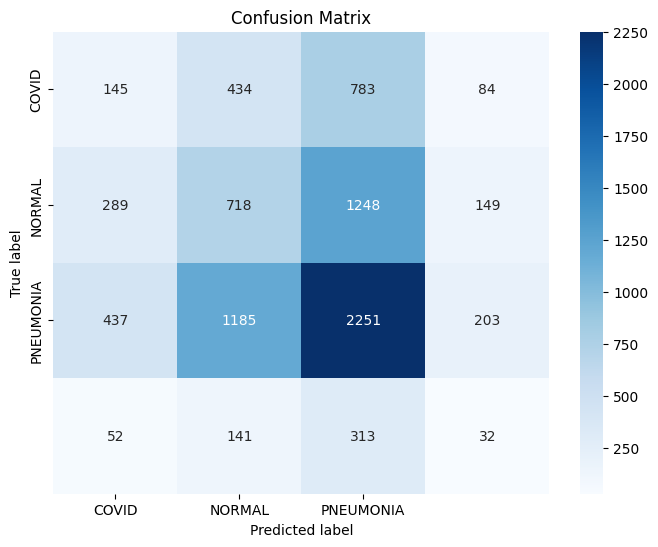

In [12]:
!pip install scikit-learn seaborn matplotlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of the code from previous cells remains the same) ...

# Get predictions for the validation set
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the validation set
y_true = val_gen.classes

# Now you can calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

# Classification report
print(f"Classification Report:\n{classification_report(y_true, y_pred_classes)}")

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['COVID', 'NORMAL', 'PNEUMONIA'], yticklabels=['COVID', 'NORMAL', 'PNEUMONIA'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()